In [1]:
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,LynAldenContact,NorthmanTrader,ReutersBiz,caroljsroth,financialjuice,zerohedge
abject,3,1,3,3,1,1
aboutface,1,0,1,1,0,0
accelerating,1,1,1,1,1,1
accepts,1,1,1,1,1,1
according,1,1,2,1,1,1


In [2]:
# find top 30 words said by each account

top_dict = {}

for u in data.columns:
    
    top = data[u].sort_values(ascending=False).head(30)
    top_dict[u] = list(zip(top.index, top.values))

top_dict
    

{'LynAldenContact': [('barkin', 11),
  ('feds', 11),
  ('rt', 10),
  ('inflation', 9),
  ('forecast', 6),
  ('previous', 6),
  ('high', 6),
  ('says', 6),
  ('actual', 5),
  ('macro', 5),
  ('auction', 5),
  ('bitcoin', 5),
  ('bidtocover', 5),
  ('power', 4),
  ('new', 4),
  ('uvalde', 4),
  ('bank', 3),
  ('global', 3),
  ('gas', 3),
  ('french', 3),
  ('fraud', 3),
  ('court', 3),
  ('companies', 3),
  ('failure', 3),
  ('expectations', 3),
  ('central', 3),
  ('economy', 3),
  ('elon', 3),
  ('abject', 3),
  ('mining', 3)],
 'NorthmanTrader': [('feds', 17),
  ('barkin', 17),
  ('inflation', 10),
  ('rt', 9),
  ('high', 7),
  ('previous', 6),
  ('says', 6),
  ('forecast', 6),
  ('macro', 5),
  ('bidtocover', 5),
  ('actual', 5),
  ('new', 5),
  ('auction', 5),
  ('power', 4),
  ('consumers', 3),
  ('spending', 3),
  ('spend', 3),
  ('set', 3),
  ('zero', 3),
  ('awards', 3),
  ('state', 3),
  ('court', 3),
  ('uk', 3),
  ('french', 3),
  ('ceo', 3),
  ('central', 3),
  ('gas', 3),
 

In [3]:
# Print top 15 words said by each twitter user

for user, top_words in top_dict.items():
    print(user)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

LynAldenContact
barkin, feds, rt, inflation, forecast, previous, high, says, actual, macro, auction, bitcoin, bidtocover, power
---
NorthmanTrader
feds, barkin, inflation, rt, high, previous, says, forecast, macro, bidtocover, actual, new, auction, power
---
ReutersBiz
rt, says, feds, barkin, high, previous, state, forecast, auction, macro, actual, bitcoin, bidtocover, inflation
---
caroljsroth
barkin, feds, rt, inflation, forecast, previous, high, says, actual, macro, auction, bitcoin, bidtocover, power
---
financialjuice
feds, barkin, inflation, rt, high, previous, says, forecast, macro, bidtocover, actual, new, auction, power
---
zerohedge
feds, barkin, inflation, rt, high, previous, says, forecast, macro, bidtocover, actual, new, auction, power
---


In [4]:
# Make World clouds
!conda install -c conda-forge wordcloud -y

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistenc/ 

  - defaults/noarch::smart_open==5.1.0=pyhd3eb1b0_0
  - defaults/noarch::google-cloud-core==1.7.1=pyhd3eb1b0_0
  - defaults/osx-64::anaconda==2022.05=py39_0
  - defaults/osx-64::gensim==4.1.2=py39he9d5cce_0
  - defaults/noarch::google-cloud-storage==1.31.0=py_0
done

## Package Plan ##

  environment location: /Users/timal/opt/anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.05  |           py39_0           7 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2022.6.15  |       h033912b_0         149 KB  conda-forge
    certifi-2022.6.15          |   py39h6e9494a_0         155 KB  conda-forge
    conda-4.13.0               |   

In [5]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', colormap="Dark2", max_font_size=150, random_state=42)

In [6]:
def get_users(filename=None):
    
    user_list = []
    
    if not filename:
        return None
    
    
    with open(filename) as f:
        for line in f:
            user_list.append(line.strip())
    
    return user_list

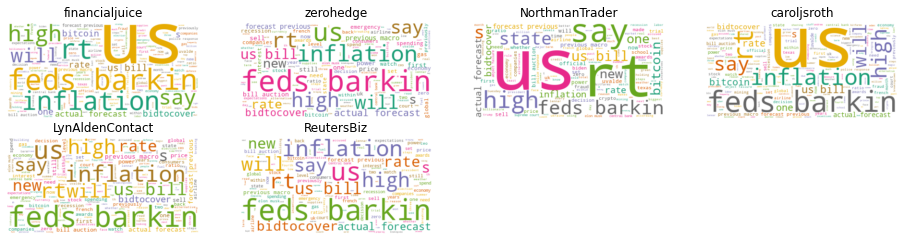

In [8]:
# reset output dimensions

import matplotlib.pyplot as plt

data_clean = pd.read_pickle('data_clean.pkl')
plt.rcParams['figure.figsize'] = [16, 6]

users = get_users('twitter_users_list')

# create subplots for each twitter account

for index, user in enumerate(data.columns):  
    wc.generate(data_clean.tweets[user])
    
    plt.subplot(3,4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(users[index])

plt.show()